In [30]:
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [31]:
common_settings = {# which output? transfer functions only
                   'output':'tCl,pCl,lCl,mPk',
                   'lensing':'yes',
                   'alpha_x' : 0,
                   'gauge':'synchronous'}

test = Class()
test.set(common_settings)
test.compute()

var_name = 'alph'
var_array = np.linspace(0,2,5)
var_num = len(var_array)
var_legend = r'$\alpha$'
var_figname = 'alpha_x'

M = {}
#
for i, N_ur in enumerate(var_array):
    #
    # rescale omega_cdm and h
    #
    #print ' * Compute with %s=%e, %s=%e, %s=%e'%('N_ur',N_ur,'omega_cdm',omega_cdm,'h',h)
    #
    # call CLASS
    #
    M[i] = Class()
    M[i].set(common_settings)
    M[i].set({'alpha_x':N_ur})
    M[i].compute()


In [21]:
test.age()

13.795359342143062

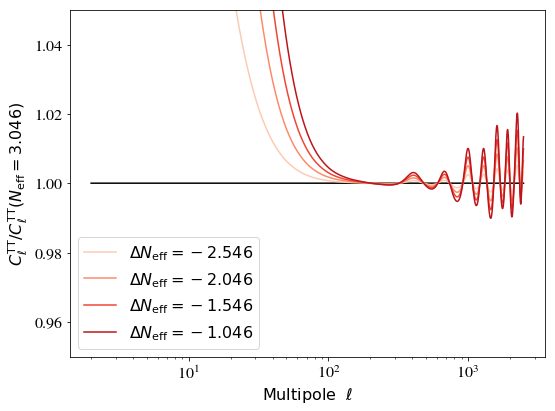

In [32]:
#############################################
#
# extract spectra and plot them
#
#############################################
kvec = np.logspace(-4,np.log10(3),1000) # array of kvec in h/Mpc
twopi = 2.*math.pi
#
# Create figures
#
fig_TT, ax_TT = plt.subplots()
#
# loop over varying parameter values
#
ll = {}
clM = {}
clTT = {}
pkM = {}
legarray = []

for i, N_ur in enumerate(var_array):
    #
    alpha = (1.+0.2271*N_ur)/(1.+0.2271*3.046)
    h = 0.67556*math.sqrt(alpha) # this is h
    #
    # deal with colors and legends
    #
    if i == 0:
        var_color = 'k'
        var_alpha = 1.
    else:
        var_color = plt.cm.Reds(0.8*i/(var_num-1))
    #
    # get Cls
    #
    clM[i] = M[i].lensed_cl(2500)
    ll[i] = clM[i]['ell'][2:]
    clTT[i] = clM[i]['tt'][2:]
    #
    #
    # plot C_l^TT
    #
    if i == 0:
        ax_TT.semilogx(ll[i],clTT[i]/clTT[0],
                       color=var_color,alpha=var_alpha,linestyle='-')
    else:    
        ax_TT.semilogx(ll[i],clTT[i]/clTT[0],
                       color=var_color,alpha=var_alpha,linestyle='-',
                      label=r'$\Delta N_\mathrm{eff}=%g$'%(N_ur-3.046))
#
# output of P(k) figure
#
#
# output of C_l^TT figure
#      
# ax_TT.set_xlim([2,2500])
ax_TT.set_ylim([0.95,1.05])
ax_TT.set_xlabel(r'$\mathrm{Multipole} \,\,\,\,  \ell$')
ax_TT.set_ylabel(r'$C_\ell^\mathrm{TT}/C_\ell^\mathrm{TT}(N_\mathrm{eff}=3.046)$')
ax_TT.legend(loc='lower left')
fig_TT.tight_layout()
fig_TT.savefig('ratio-%s-cltt.pdf' % var_figname)
#
# output of C_l^EE figure
#    
#ax_EE.set_xlim([2,2500])
#ax_EE.set_xlabel(r'$\ell$')
#ax_EE.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{EE}$')
#ax_EE.legend(legarray,loc='lower right')
#fig_EE.tight_layout()
#fig_EE.savefig('spectra_%s_clee.pdf' % var_figname)
#
# output of C_l^pp figure
#   
#ax_PP.set_xlim([10,2500])
#ax_PP.set_xlabel(r'$\ell$')
#ax_PP.set_ylabel(r'$[\ell^2(\ell+1)^2/2\pi]  C_\ell^\mathrm{\phi \phi}$')
#ax_PP.legend(legarray)
#fig_PP.tight_layout()
#fig_PP.savefig('spectra_%s_clpp.pdf' % var_figname)